### 01. Import Dependecies

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import RobustScaler

### 02. Import Data

In [26]:
df = pd.read_csv("data/processed/feature_engineered.csv")
df.head()

,purchase_value,source,browser,sex,age,class,account_age_minutes,device_count,user_count_per_device,country
0,34,SEO,Chrome,M,39,0,75111.37,1,1,Japan
1,16,Ads,Chrome,F,53,0,299.07,1,1,United States
2,15,SEO,Opera,M,53,1,0.02,12,12,United States
3,44,SEO,Safari,M,41,0,8201.42,1,1,Unknown
4,39,Ads,Safari,M,45,0,72691.02,1,1,United States


In [27]:
df.columns

Index(['purchase_value', 'source', 'browser', 'sex', 'age', 'class',
       'account_age_minutes', 'device_count', 'user_count_per_device',
       'country'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144272 entries, 0 to 144271
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   purchase_value         144272 non-null  int64  
 1   source                 144272 non-null  object 
 2   browser                144272 non-null  object 
 3   sex                    144272 non-null  object 
 4   age                    144272 non-null  int64  
 5   class                  144272 non-null  int64  
 6   account_age_minutes    144272 non-null  float64
 7   device_count           144272 non-null  int64  
 8   user_count_per_device  144272 non-null  int64  
 9   country                144272 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 11.0+ MB


### Creating new column

In [29]:
numerical_columns = [
    'purchase_value', 
    'account_age_minutes', 
    'device_count', 
    'user_count_per_device'
]

categorical_columns = [
    'source', 
    'browser', 
    'sex', 
    'country'
]

### 03. Plotting

#### 3.1 Distribution Plots

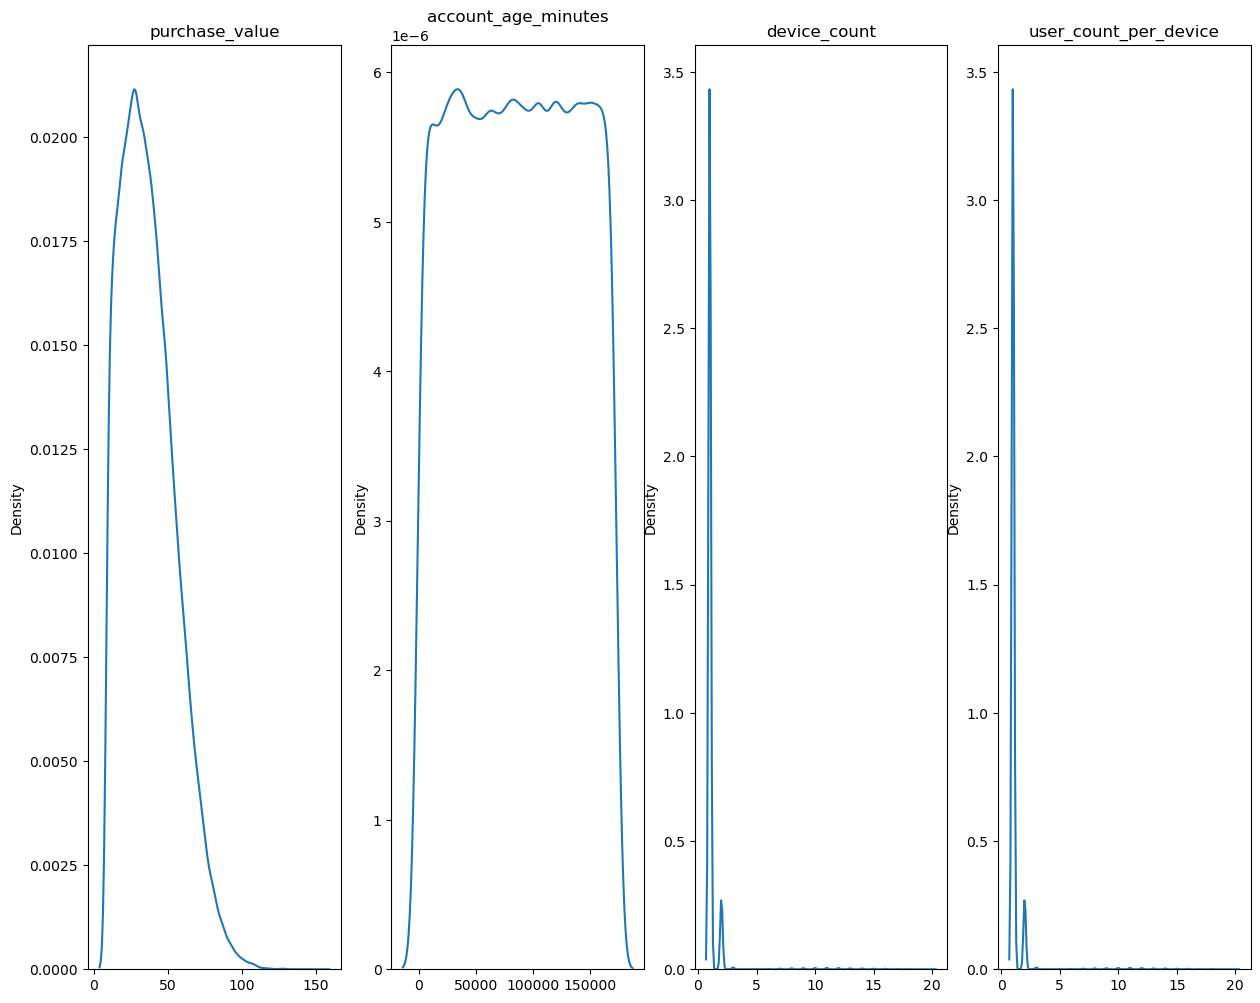

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(15, 12))
axes = axes.flatten()
for idx,col in enumerate(numerical_columns):
        sns.kdeplot(
                    data=df[col],
                    ax=axes[idx]
                    )
        axes[idx].set_title(col)
        axes[idx].set_xlabel('')

#### 3.2 Pie plot

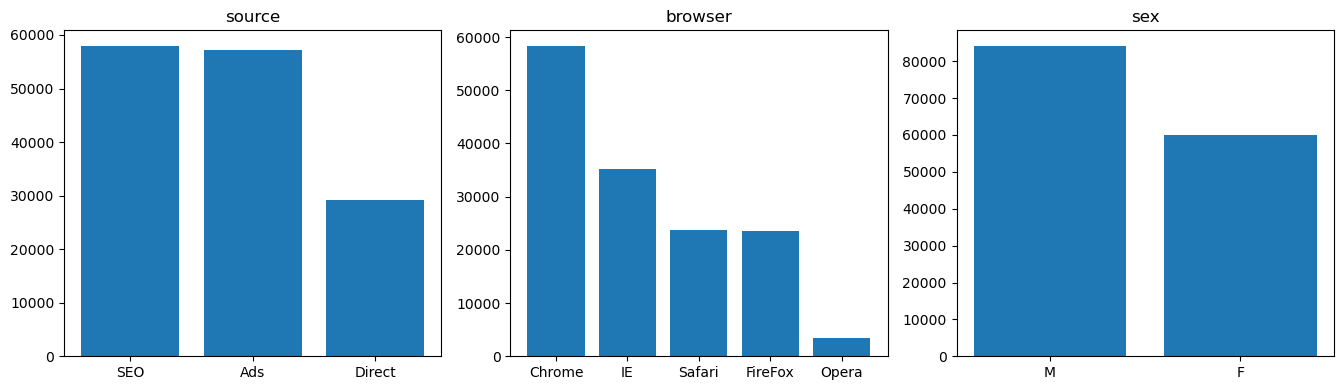

In [31]:
plot_cols = [
    col for col in categorical_columns
    if df[col].nunique() <= 20
]

n_cols = 4
n_rows = math.ceil(len(plot_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    counts = df[col].value_counts().head(5)
    axes[i].bar(counts.index.astype(str), counts.values)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 3.3 Box plot

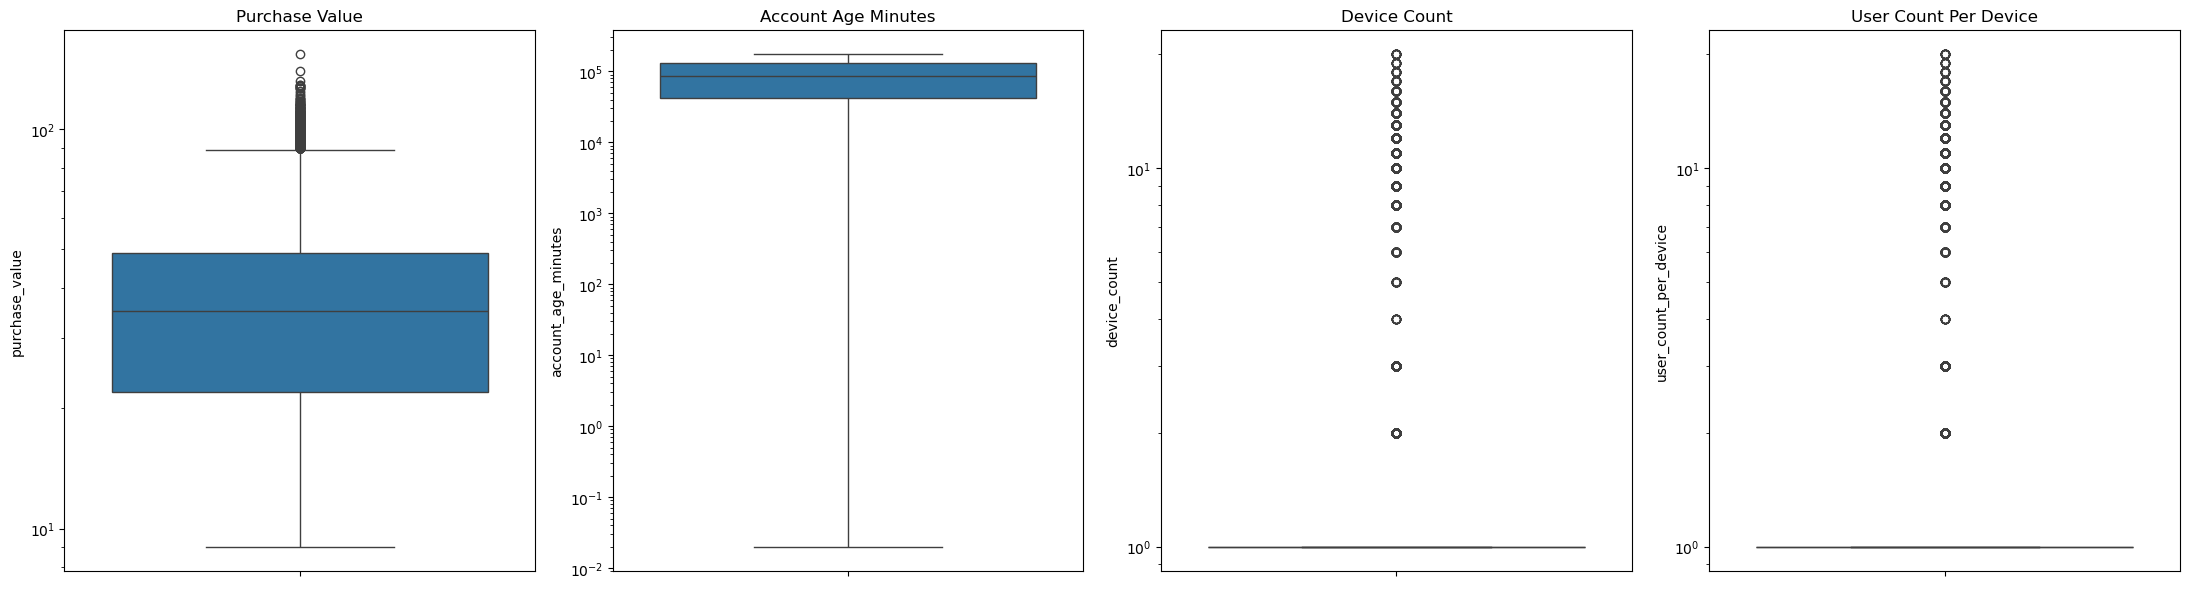

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(22, 6))

cols = [
    'purchase_value',
    'account_age_minutes',
    'device_count',
    'user_count_per_device'
]

for ax, col in zip(axes, cols):
    sns.boxplot(y=df[col], ax=ax, showfliers=True)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_yscale('log')  # KEY FIX

plt.tight_layout()
plt.show()
